In [1]:
from main import *

## Two - Tetra  $\mu_r = 32$ 

CSG_TwoTetra/al_0.001_mu_32_sig_1e7/1e1-1e8_40_el_24874_ord_3_POD_13_1e-7/Data/
Opening files from this path =  CSG_TwoTetra/al_0.001_mu_32_sig_1e7/1e1-1e8_40_el_24874_ord_3_POD_13_1e-7/Data/


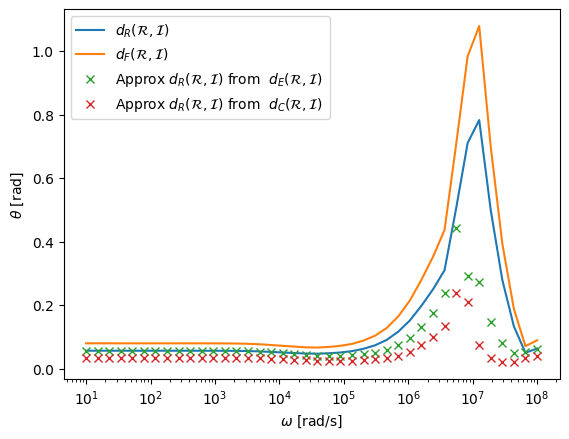

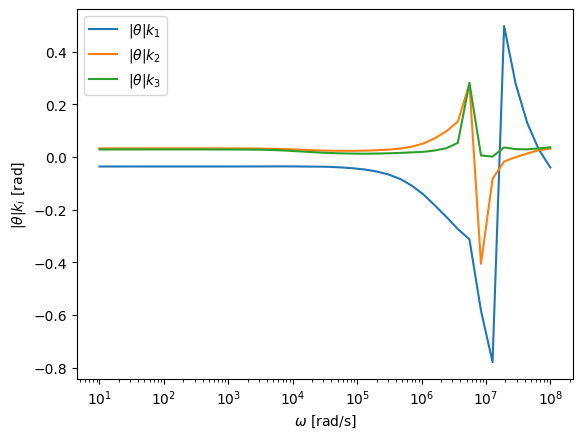

Computing F measure Tilde


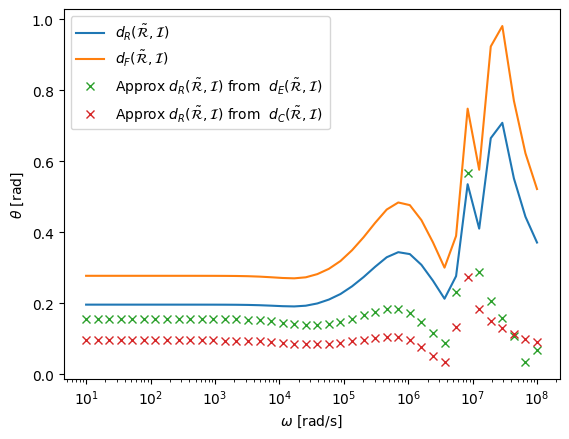

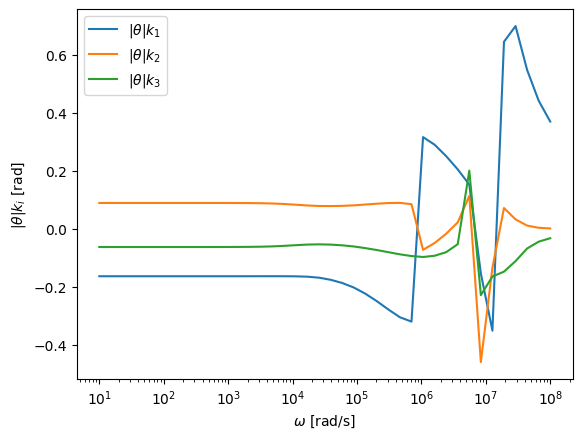

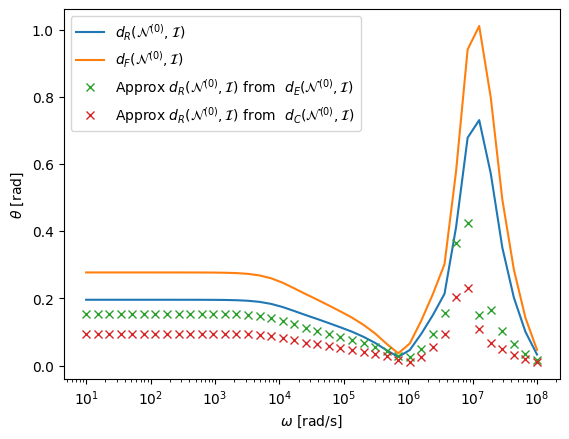

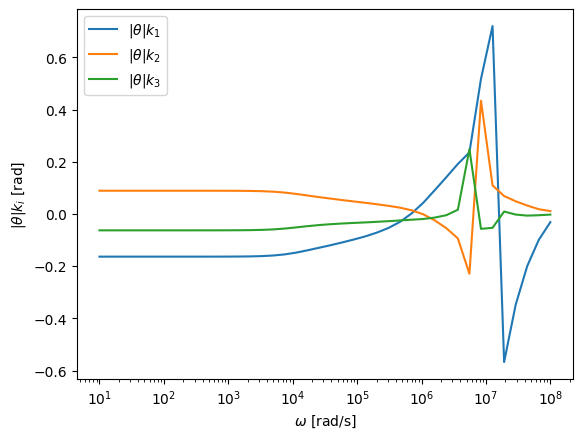

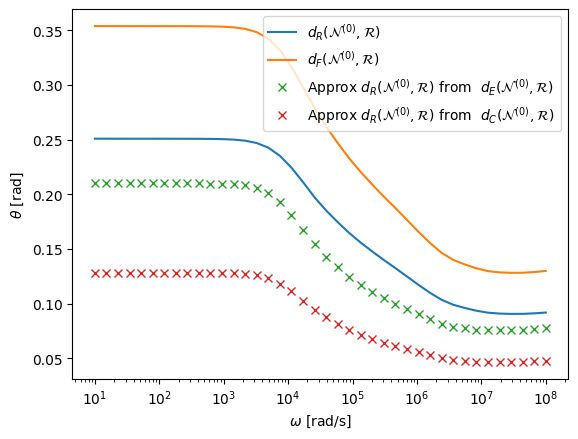

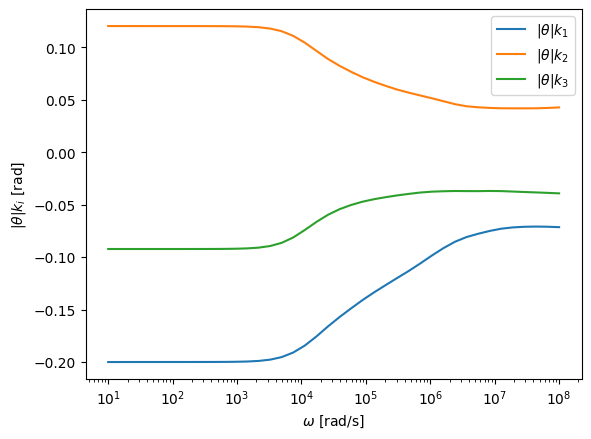

/Users/paulledger/Coding/Rodrigues_Angles/src/StableAngle.py:10: RuntimeWarning: invalid value encountered in arccos
  theta = np.arccos((np.trace(Q)-1.)/2.)
/Users/paulledger/Coding/Rodrigues_Angles/src/Fmeasure.py:36: RuntimeWarning: divide by zero encountered in scalar divide
  Fexactconst[n] = np.abs(np.linalg.norm(R-I,ord='fro')**2 - diffeig) / np.abs(normalisation)
/Users/paulledger/Coding/Rodrigues_Angles/src/Commeasure.py:37: RuntimeWarning: divide by zero encountered in scalar divide
  Comexactconst[n] = np.abs(np.linalg.norm(Z,ord='fro')**2 ) / np.abs(normalisation)


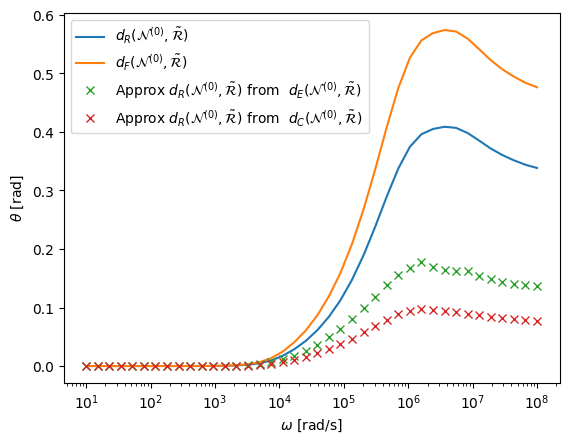

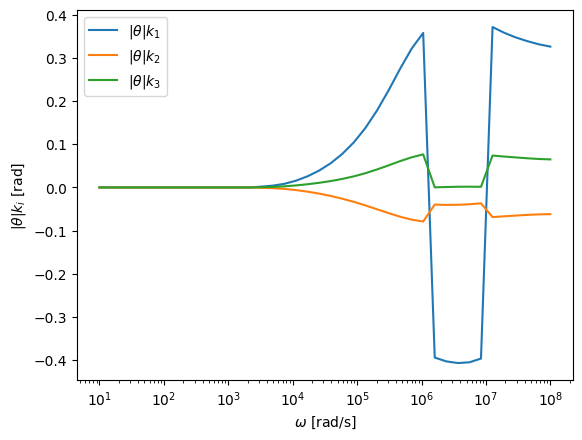

In [2]:
DirList=["CSG_TwoTetra/al_0.001_mu_32_sig_1e7/1e1-1e8_40_el_24874_ord_3_POD_13_1e-7/Data/"]
SaveRIList=[]
SaveRtilde=[]

MaxOmega=1e8
for directory in DirList:
    print(directory)
    RIResults,RtildeIResults, N0IResults, N0RResults, N0RtildeResults=main(directory,MaxOmega, Figures="On")

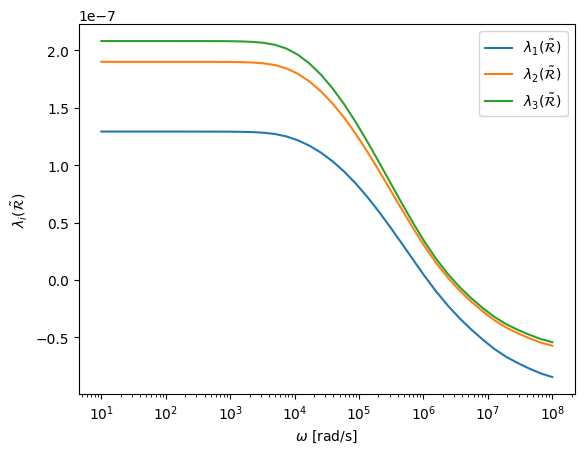

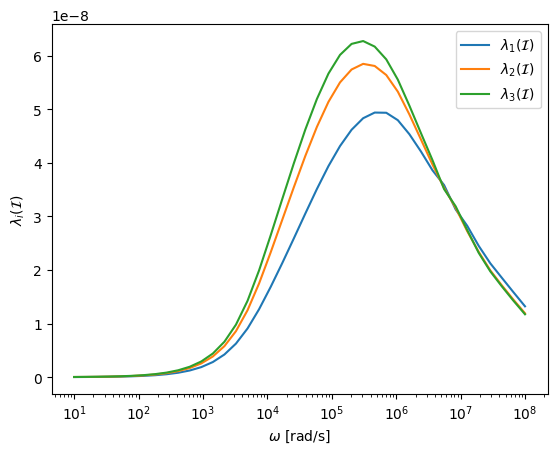

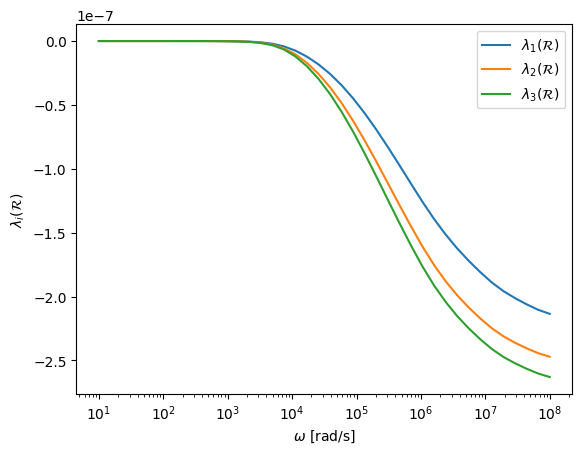

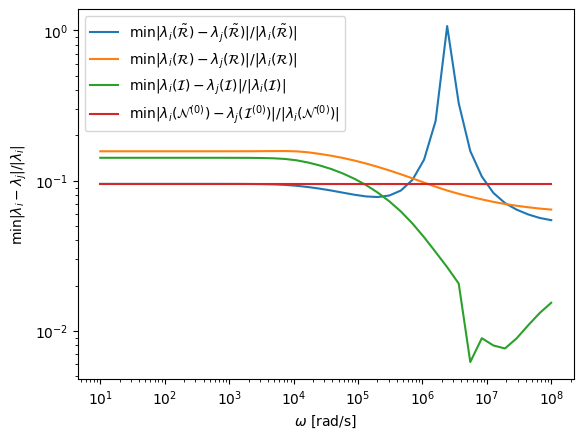

In [3]:
Frequencies=RIResults["Frequencies"]
URstore=RIResults["URstore"]
URtildestore=RIResults["URtildestore"]
UIstore=RIResults["UIstore"]
UN0store=RIResults["UN0store"]


Labels=[r"$\lambda_1(\tilde{\cal R})$",r"$\lambda_2(\tilde{\cal R})$",r"$\lambda_3(\tilde{\cal R})$"]
plt.figure()
for n in range(3):
    plt.semilogx(Frequencies,URtildestore[:,n],label=Labels[n])
plt.legend()
plt.xlabel(r"$\omega$ [rad/s]")
plt.ylabel(r"$\lambda_i(\tilde{\cal R})$")
plt.savefig("CSG_TwoTetra_dRanddE__eig_Rtilde_al_0.001_mu_32_sig_1e7_ord3.pdf")
plt.show()

plt.figure()
Labels=[r"$\lambda_1({\cal I})$",r"$\lambda_2({\cal I})$",r"$\lambda_3({\cal I})$"]
for n in range(3):
    plt.semilogx(Frequencies,UIstore[:,n],label=Labels[n])
plt.legend()
plt.xlabel(r"$\omega$ [rad/s]")
plt.ylabel(r"$\lambda_i({\cal I})$")
plt.savefig("CSG_TwoTetra_dRanddE__eig_I_al_0.001_mu_32_sig_1e7_ord3.pdf")

plt.show()

plt.figure()
Labels=[r"$\lambda_1({\cal R})$",r"$\lambda_2({\cal R})$",r"$\lambda_3({\cal R})$"]
for n in range(3):
    plt.semilogx(Frequencies,URstore[:,n],label=Labels[n])
plt.legend()
plt.xlabel(r"$\omega$ [rad/s]")
plt.ylabel(r"$\lambda_i({\cal R})$")
plt.savefig("CSG_TwoTetra_dRanddE__eig_R_al_0.001_mu_32_sig_1e7_ord3.pdf")
plt.show()




relmindiffRtilde = np.zeros(len(Frequencies))
relmindiffI = np.zeros(len(Frequencies))
relmindiffR = np.zeros(len(Frequencies))
relmindiffN0 = np.zeros(len(Frequencies))


for n in range(len(Frequencies)):
    d=1e6
    for m in range(3):
        for k in range(m+1,3):
            if abs(URtildestore[n,m]-URtildestore[n,k])/abs(URtildestore[n,m]) < d:
                d=abs(URtildestore[n,m]-URtildestore[n,k])/abs(URtildestore[n,m])
    relmindiffRtilde[n]=d
    d=1e6
    for m in range(3):
        for k in range(m+1,3):
            if abs(UIstore[n,m]-UIstore[n,k])/abs(UIstore[n,m]) < d:
                d=abs(UIstore[n,m]-UIstore[n,k])/abs(UIstore[n,m]) 
    relmindiffI[n]=d
    d=1e6
    for m in range(3):
        for k in range(m+1,3):
            if abs(URstore[n,m]-URstore[n,k])/abs(URstore[n,m]) < d:
                d=abs(URstore[n,m]-URstore[n,k])/abs(URstore[n,m]) 
    relmindiffR[n]=d
    d=1e6
    for m in range(3):
        for k in range(m+1,3):
            if abs(UN0store[n,m]-UN0store[n,k])/abs(UN0store[n,m]) < d:
                d=abs(UN0store[n,m]-UN0store[n,k])/abs(UN0store[n,m]) 
    relmindiffN0[n]=d
     
plt.figure()
plt.loglog(Frequencies,relmindiffRtilde,label=r"$\min |\lambda_i(\tilde{\cal R})-\lambda_j(\tilde{\cal R})|/|\lambda_i(\tilde{\cal R})|$")
plt.loglog(Frequencies,relmindiffR,label=r"$\min |\lambda_i({\cal R})-\lambda_j({\cal R})|/|\lambda_i({\cal R})|$")
plt.loglog(Frequencies,relmindiffI,label=r"$\min |\lambda_i({\cal I})-\lambda_j({\cal I})|/|\lambda_i({\cal I})|$")
plt.loglog(Frequencies,relmindiffN0,label=r"$\min |\lambda_i({\cal N}^{(0)})-\lambda_j({\cal I}^{(0)})|/|\lambda_i({\cal N}^{(0)})|$")

plt.xlabel(r"$\omega$ [rad/s]")
plt.ylabel(r"$\min |\lambda_i-\lambda_j|/|\lambda_i|$")
plt.legend()
plt.savefig("CSG_TwoTetra_dRanddE__eig_prox_al_0.001_mu_32_sig_1e7_ord3.pdf")



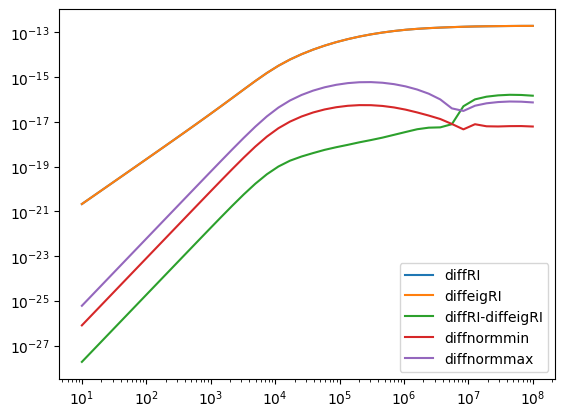

In [4]:
Perm = np.array([[1,2,3],[1,3,2],[2,1,3],[2,3,1],[3,1,2],[3,2,1]])

Frequencies=RIResults["Frequencies"]
URstore=RIResults["URstore"]
URtildestore=RIResults["URtildestore"]
UIstore=RIResults["UIstore"]
UN0store=RIResults["UN0store"]

Rstore=RIResults["Rstore"]
Rtildestore=RIResults["Rtildestore"]
Istore=RIResults["Istore"]
N0store=RIResults["N0store"]


N=len(Frequencies)
diffRI=np.zeros(N)
diffeigRI=np.zeros(N)
diffnormmin=np.zeros(N)
diffnormmax=np.zeros(N)
uR=np.zeros(3)
uI=np.zeros(3)
R=np.zeros((3,3))
I=np.zeros((3,3))
Rtilde=np.zeros((3,3))
N0=np.zeros((3,3))

sorteigenvalues="MaxDifference"
for n in range(N):
    for i in range(3):
        uR[i]=URstore[n,i]
        uI[i]=UIstore[n,i]

        for j in range(3):
            R[i,j]=Rstore[n,i,j]
            I[i,j]=Istore[n,i,j]
            Rtilde[i,j]=Rtildestore[n,i,j]
            N0[i,j]=N0store[n,i,j]
        
            
    if sorteigenvalues=="MinDifference":
            # Find min combination

        diffeig=1e10

    elif sorteigenvalues=="MaxDifference":
            # Find max combination
        diffeig=0.

    for m in range(6):
        mysum=0.
        ind=Perm[m,:]
        for i in range(3):
            mysum = mysum+ (uR[i]-uI[ind[i]-1])**2
        check = False
        if sorteigenvalues=="MinDifference" and mysum < diffeig:
            check = True
        elif sorteigenvalues=="MaxDifference" and mysum > diffeig:
            check = True
        if check==True:
            diffeig = mysum
            puI=np.zeros(3,dtype=np.longdouble)
        #         #S=np.zeros((3,3))
            for i in range(3):
                puI[i]=uI[ind[i]-1]
       
    

    evlist=np.zeros(3)    
    evlist[0]= - (puI[1]-puI[2])*(uR[1]-uR[2])
    evlist[1]= - (puI[0]-puI[2])*(uR[0]-uR[2])
    evlist[2]= - (puI[0]-puI[1])*(uR[0]-uR[1])
    normalisation_min = np.min(np.abs(evlist))
    normalisation_max = np.max(np.abs(evlist))

    Tol=1e-6
    diffRI[n]=np.linalg.norm(R-I,ord='fro')**2
    diffeigRI[n]=diffeig
    diffnormmin[n]=normalisation_min
    diffnormmax[n]=normalisation_max

plt.figure()
plt.loglog(Frequencies,diffRI,label='diffRI')
plt.loglog(Frequencies,diffeigRI,label='diffeigRI')
plt.loglog(Frequencies,np.abs(diffeigRI-diffRI),label='diffRI-diffeigRI')

plt.loglog(Frequencies,diffnormmin,label='diffnormmin')
plt.loglog(Frequencies,diffnormmax,label='diffnormmax')
plt.legend()


In [ ]:
Frequencies=RIResults["Frequencies"]
Rstore=RIResults["Rstore"]
Rtildestore=RIResults["Rtildestore"]
Istore=RIResults["Istore"]
N0store=RIResults["N0store"]



dict_keys(['Frequencies', 'MinAnglestoreRI', 'AnglestoreRIfmeasapprxconstsortedmaxdiff_max', 'AnglestoreRIfmeasapprxconstsortedmindiff_min', 'AnglestoreRIfmeasapprxconstsortedmaxdiff_min', 'AnglestoreRIfmeasapprxconstsortedmindiff_max', 'dFMinAnglestoreRI', 'dFMaxAnglestoreRI', 'AnglestoreRIcommeasapprxconstsortedmaxdiff_max', 'AnglestoreRIcommeasapprxconstsortedmindiff_min', 'AnglestoreRIcommeasapprxconstsortedmaxdiff_min', 'AnglestoreRIcommeasapprxconstsortedmindiff_max', 'RIfmeasapprx_den_const_max', 'RIfmeasapprx_den_const_min', 'RIcommeapprx_den_const_max', 'RIcommeapprx_den_const_min', 'URstore', 'UIstore', 'URtildestore', 'UN0store', 'QRstore', 'QIstore', 'QRtildestore', 'QN0store', 'AnglestoreRIfmeasfullconstsortedmindiff', 'AnglestoreRIfmeasfullconstsortedmaxdiff', 'AnglestoreRIcommeasfullconstsortedmindiff', 'AnglestoreRIcommeasfullconstsortedmaxdiff', 'Rstore', 'Istore', 'Rtildestore', 'N0store'])


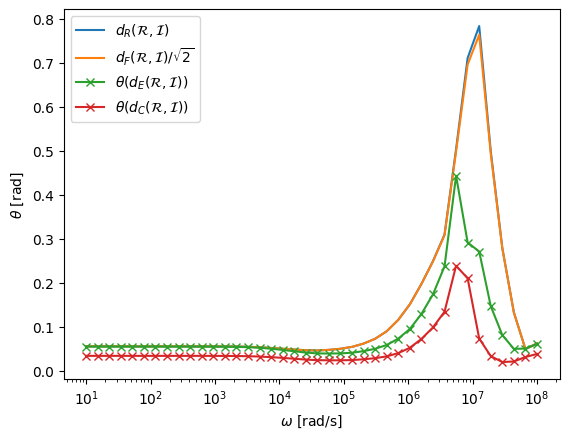

In [5]:
print(RIResults.keys())

Frequencies=RIResults["Frequencies"]
MinAnglestoreRI=RIResults["MinAnglestoreRI"]
AnglestoreRIfmeasapprxconstsortedmin=np.fmin(RIResults["AnglestoreRIfmeasapprxconstsortedmaxdiff_min"],RIResults["AnglestoreRIfmeasapprxconstsortedmindiff_min"])
AnglestoreRIcommeasapprxconstsortedmin=np.fmin(RIResults["AnglestoreRIcommeasapprxconstsortedmaxdiff_min"],RIResults["AnglestoreRIcommeasapprxconstsortedmindiff_min"])

dFMinAnglestoreRI = RIResults["dFMinAnglestoreRI"]
fig=plt.figure()
plt.semilogx(Frequencies,MinAnglestoreRI,label=r'$d_R({\cal R},{\cal I})$')
plt.semilogx(Frequencies,dFMinAnglestoreRI/np.sqrt(2),label=r'$d_F({\cal R},{\cal I})/\sqrt{2}$')
plt.semilogx(Frequencies,AnglestoreRIfmeasapprxconstsortedmin,'-x',label=r'$\theta(d_E({\cal R},{\cal I}))$ ')
plt.semilogx(Frequencies,AnglestoreRIcommeasapprxconstsortedmin,'-x',label=r'$\theta(d_C({\cal R},{\cal I}))$ ')

plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel(r'$\theta$ [rad]')
#plt.ylim(0,0.2)
plt.legend()
plt.savefig("CSG_TwoTetra_dRanddE_metrics_al_0.001_mu_32_sig_1e7_ord3.pdf")
plt.show()

dict_keys(['Frequencies', 'MinAnglestoreRI', 'AnglestoreRIfmeasapprxconstsortedmaxdiff_max', 'AnglestoreRIfmeasapprxconstsortedmindiff_min', 'AnglestoreRIfmeasapprxconstsortedmaxdiff_min', 'AnglestoreRIfmeasapprxconstsortedmindiff_max', 'dFMinAnglestoreRI', 'dFMaxAnglestoreRI', 'AnglestoreRIcommeasapprxconstsortedmaxdiff_max', 'AnglestoreRIcommeasapprxconstsortedmindiff_min', 'AnglestoreRIcommeasapprxconstsortedmaxdiff_min', 'AnglestoreRIcommeasapprxconstsortedmindiff_max', 'RIfmeasapprx_den_const_max', 'RIfmeasapprx_den_const_min', 'RIcommeapprx_den_const_max', 'RIcommeapprx_den_const_min', 'URstore', 'UIstore', 'URtildestore', 'UN0store', 'QRstore', 'QIstore', 'QRtildestore', 'QN0store', 'AnglestoreRIfmeasfullconstsortedmindiff', 'AnglestoreRIfmeasfullconstsortedmaxdiff', 'AnglestoreRIcommeasfullconstsortedmindiff', 'AnglestoreRIcommeasfullconstsortedmaxdiff', 'Rstore', 'Istore', 'Rtildestore', 'N0store'])


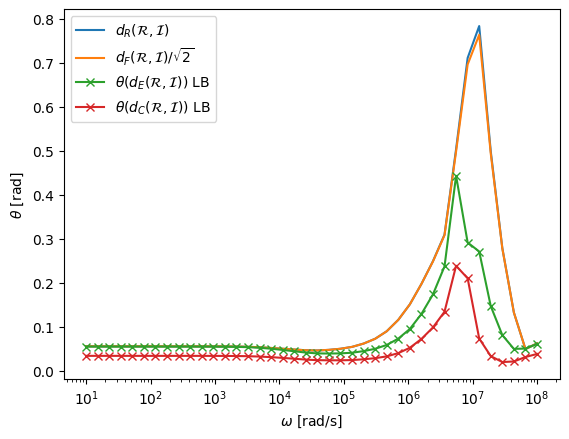

In [6]:

print(RIResults.keys())

Frequencies=RIResults["Frequencies"]
MinAnglestoreRI=RIResults["MinAnglestoreRI"]
AnglestoreRIfmeasapprxconstsortedmin=np.fmin(RIResults["AnglestoreRIfmeasapprxconstsortedmaxdiff_min"],RIResults["AnglestoreRIfmeasapprxconstsortedmindiff_min"])
AnglestoreRIcommeasapprxconstsortedmin=np.fmin(RIResults["AnglestoreRIcommeasapprxconstsortedmaxdiff_min"],RIResults["AnglestoreRIcommeasapprxconstsortedmindiff_min"])

#AnglestoreRIfmeasupper=np.fmax(RIResults["AnglestoreRIfmeasapprxconstsortedmaxdiff_max"],RIResults["AnglestoreRIfmeasapprxconstsortedmaxdiff_min"])
#AnglestoreRIfmeaslower=np.fmin(RIResults["AnglestoreRIfmeasapprxconstsortedmaxdiff_max"],RIResults["AnglestoreRIfmeasapprxconstsortedmaxdiff_min"])

##AnglestoreRIfmeasupper=np.fmax(AnglestoreRIfmeasupper,RIResults["AnglestoreRIfmeasapprxconstsortedmindiff_max"],RIResults["AnglestoreRIfmeasapprxconstsortedmindiff_min"])
#AnglestoreRIfmeaslower=np.fmin(AnglestoreRIfmeaslower,RIResults["AnglestoreRIfmeasapprxconstsortedmindiff_max"],RIResults["AnglestoreRIfmeasapprxconstsortedmindiff_min"])
#AnglestoreRIfmeasavg=(AnglestoreRIfmeasupper+AnglestoreRIfmeaslower)/2

#AnglestoreRIcommmupper=np.fmax(RIResults["AnglestoreRIcommeasapprxconstsortedmaxdiff_max"],RIResults["AnglestoreRIcommeasapprxconstsortedmaxdiff_min"])
#AnglestoreRIcommmlower=np.fmin(RIResults["AnglestoreRIcommeasapprxconstsortedmaxdiff_max"],RIResults["AnglestoreRIcommeasapprxconstsortedmaxdiff_min"])
#AnglestoreRIcommmavg = (AnglestoreRIcommmupper+AnglestoreRIcommmlower )/2

#AnglestoreRIcommmupper=np.fmax(AnglestoreRIcommmupper,RIResults["AnglestoreRIcommeasapprxconstsortedmindiff_max"],RIResults["AnglestoreRIcommeasapprxconstsortedmindiff_min"])
#AnglestoreRIcommmlower=np.fmin(AnglestoreRIcommmlower,RIResults["AnglestoreRIcommeasapprxconstsortedmindiff_max"],RIResults["AnglestoreRIcommeasapprxconstsortedmindiff_min"])
#AnglestoreRIcommmavg = (AnglestoreRIcommmupper+AnglestoreRIcommmlower )/2



dFMinAnglestoreRI = RIResults["dFMinAnglestoreRI"]
fig=plt.figure()
plt.semilogx(Frequencies,MinAnglestoreRI,label=r'$d_R({\cal R},{\cal I})$')
plt.semilogx(Frequencies,dFMinAnglestoreRI/np.sqrt(2),label=r'$d_F({\cal R},{\cal I})/\sqrt{2}$')
plt.semilogx(Frequencies,AnglestoreRIfmeasapprxconstsortedmin,'-x',label=r'$\theta(d_E({\cal R},{\cal I}))$ LB')

plt.semilogx(Frequencies,AnglestoreRIcommeasapprxconstsortedmin,'-x',label=r'$\theta(d_C({\cal R},{\cal I}))$ LB')


plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel(r'$\theta$ [rad]')
#plt.ylim(0,0.2)
plt.legend()
plt.savefig("CSG_TwoTetra_dRanddE_metrics_al_0.001_mu_32_sig_1e7_ord3.pdf")
plt.show()


dict_keys(['Frequencies', 'MinAnglestoreRtildeI', 'AnglestoreRtildeIfmeasapprxconstsortedmaxdiff_max', 'AnglestoreRtildeIfmeasapprxconstsortedmindiff_min', 'AnglestoreRtildeIfmeasapprxconstsortedmaxdiff_min', 'AnglestoreRtildeIfmeasapprxconstsortedmindiff_max', 'AnglestoreRtildeIfmeasfullconstsortedmindiff', 'AnglestoreRtildeIfmeasfullconstsortedmaxdiff', 'dFMinAnglestoreRtildeI', 'dFMaxAnglestoreRtildeI', 'AnglestoreRtildeIcommeasapprxconstsortedmaxdiff_max', 'AnglestoreRtildeIcommeasapprxconstsortedmaxdiff_min', 'AnglestoreRtildeIcommeasapprxconstsortedmindiff_min', 'AnglestoreRtildeIcommeasapprxconstsortedmindiff_max', 'RtildeIfmeasapprx_den_const_max', 'RtildeIfmeasapprx_den_const_min', 'RtildeIcommeapprx_den_const_max', 'RtildeIcommeapprx_den_const_min'])


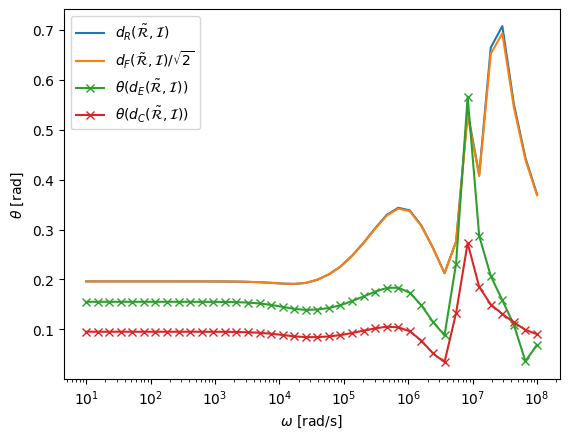

In [7]:
print(RtildeIResults.keys())

Frequencies=RtildeIResults["Frequencies"]
MinAnglestoreRtildeI=RtildeIResults["MinAnglestoreRtildeI"]
AnglestoreRtildeIfmeasapprxconstsortedmin=np.fmin(RtildeIResults["AnglestoreRtildeIfmeasapprxconstsortedmaxdiff_min"],RtildeIResults["AnglestoreRtildeIfmeasapprxconstsortedmindiff_min"])
AnglestoreRtildeIcommeasapprxconstsortedmin=np.fmin(RtildeIResults["AnglestoreRtildeIcommeasapprxconstsortedmaxdiff_min"],RtildeIResults["AnglestoreRtildeIcommeasapprxconstsortedmindiff_min"])

dFMinAnglestoreRtildeI = RtildeIResults["dFMinAnglestoreRtildeI"]
fig=plt.figure()
plt.semilogx(Frequencies,MinAnglestoreRtildeI,label=r'$d_R(\tilde{\cal R},{\cal I})$')
plt.semilogx(Frequencies,dFMinAnglestoreRtildeI/np.sqrt(2),label=r'$d_F(\tilde{\cal R},{\cal I})/\sqrt{2}$')
plt.semilogx(Frequencies,AnglestoreRtildeIfmeasapprxconstsortedmin,'x-',label=r'$\theta(d_E(\tilde{\cal R},{\cal I}))$ ')
plt.semilogx(Frequencies,AnglestoreRtildeIcommeasapprxconstsortedmin,'x-',label=r'$\theta(d_C(\tilde{\cal R},{\cal I}))$ ')

plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel(r'$\theta$ [rad]')
#plt.ylim(0,0.5)
plt.legend()
plt.savefig("CSG_TwoTetra_dRanddE_metrics_tilde_al_0.001_mu_32_sig_1e7_ord3.pdf")
plt.show()

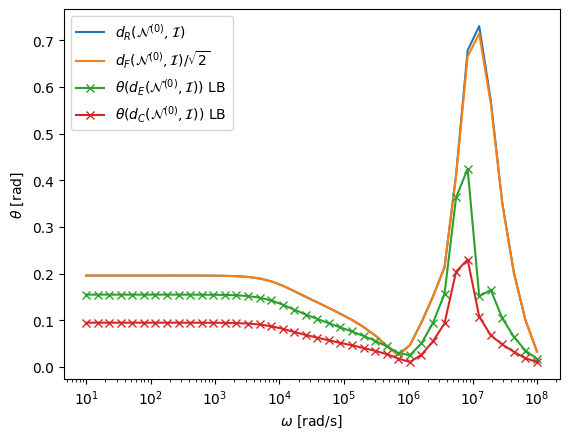

In [8]:

Frequencies=N0IResults["Frequencies"]
MinAnglestoreN0I=N0IResults["MinAnglestoreN0I"]
AnglestoreN0Ifmeasapprxconstsortedmin=np.fmin(N0IResults["AnglestoreN0Ifmeasapprxconstsortedmaxdiff_min"],N0IResults["AnglestoreN0Ifmeasapprxconstsortedmindiff_min"])
AnglestoreN0Icommeasapprxconstsortedmin=np.fmin(N0IResults["AnglestoreN0Icommeasapprxconstsortedmaxdiff_min"],N0IResults["AnglestoreN0Icommeasapprxconstsortedmindiff_min"])

dFMinAnglestoreN0I = N0IResults["dFMinAnglestoreN0I"]
fig=plt.figure()
plt.semilogx(Frequencies,MinAnglestoreN0I,label=r'$d_R({\cal N}^{(0)},{\cal I})$')
plt.semilogx(Frequencies,dFMinAnglestoreN0I/np.sqrt(2),label=r'$d_F({\cal N}^{(0)},{\cal I})/\sqrt{2}$')
plt.semilogx(Frequencies,AnglestoreN0Ifmeasapprxconstsortedmin,'x-',label=r'$\theta(d_E({\cal N}^{(0)},{\cal I}))$ LB')
plt.semilogx(Frequencies,AnglestoreN0Icommeasapprxconstsortedmin,'x-',label=r'$\theta(d_C({\cal N}^{(0)},{\cal I}))$ LB ')


plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel(r'$\theta$ [rad]')
#plt.ylim(0,0.5)
plt.legend()
plt.savefig("CSG_TwoTetra_dRanddE_metrics_N0I_al_0.001_mu_32_sig_1e7_ord3.pdf")
plt.show()

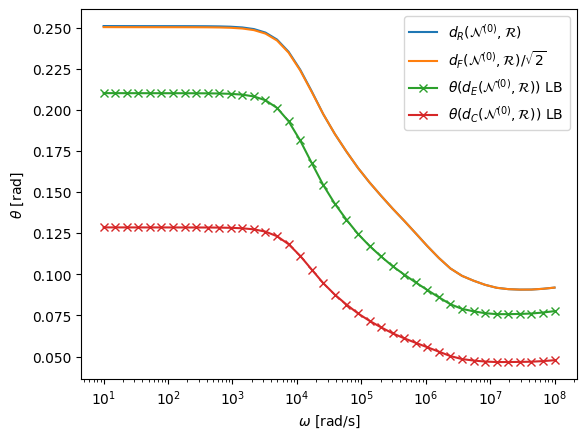

In [9]:
Frequencies=N0RResults["Frequencies"]
MinAnglestoreN0R=N0RResults["MinAnglestoreN0R"]
AnglestoreN0Rfmeasapprxconstsortedmin=np.fmin(N0RResults["AnglestoreN0Rfmeasapprxconstsortedmaxdiff_min"],N0RResults["AnglestoreN0Rfmeasapprxconstsortedmindiff_min"])
AnglestoreN0Rfmeasapprxconstsortedmax=np.fmax(N0RResults["AnglestoreN0Rfmeasapprxconstsortedmaxdiff_max"],N0RResults["AnglestoreN0Rfmeasapprxconstsortedmindiff_max"])

AnglestoreN0Rcommeasapprxconstsortedmin=np.fmin(N0RResults["AnglestoreN0Rcommeasapprxconstsortedmaxdiff_min"],N0RResults["AnglestoreN0Rcommeasapprxconstsortedmindiff_min"])
AnglestoreN0Rcommeasapprxconstsortedmax=np.fmax(N0RResults["AnglestoreN0Rcommeasapprxconstsortedmaxdiff_max"],N0RResults["AnglestoreN0Rcommeasapprxconstsortedmindiff_max"])


dFMinAnglestoreN0R = N0RResults["dFMinAnglestoreN0R"]
fig=plt.figure()
plt.semilogx(Frequencies,MinAnglestoreN0R,label=r'$d_R({\cal N}^{(0)},{\cal R})$')
plt.semilogx(Frequencies,dFMinAnglestoreN0R/np.sqrt(2),label=r'$d_F({\cal N}^{(0)},{\cal R})/\sqrt{2}$')
plt.semilogx(Frequencies,AnglestoreN0Rfmeasapprxconstsortedmin,'x-',label=r'$\theta(d_E({\cal N}^{(0)},{\cal R}))$ LB')

plt.semilogx(Frequencies,AnglestoreN0Rcommeasapprxconstsortedmin,'x-',label=r'$\theta(d_C({\cal N}^{(0)},{\cal R}))$ LB ')


plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel(r'$\theta$ [rad]')
#plt.ylim(0,0.5)
plt.legend()
plt.savefig("CSG_TwoTetra_dRanddE_metrics_N0R_al_0.001_mu_32_sig_1e7_ord3.pdf")


plt.show()

In [10]:
## Loop over different Permeabilities and compare results

DirList=["CSG_TwoTetra/al_0.001_mu_1_sig_1e7/1e1-1e8_40_el_24874_ord_3_POD_13_1e-7/Data/",
         "CSG_TwoTetra/al_0.001_mu_2_sig_1e7/1e1-1e8_40_el_24874_ord_3_POD_13_1e-7/Data/",
         "CSG_TwoTetra/al_0.001_mu_8_sig_1e7/1e1-1e8_40_el_25014_ord_3_POD_13_1e-7/Data/",
         "CSG_TwoTetra/al_0.001_mu_16_sig_1e7/1e1-1e8_40_el_25014_ord_3_POD_13_1e-7/Data/",
         "CSG_TwoTetra/al_0.001_mu_32_sig_1e7/1e1-1e8_40_el_24874_ord_3_POD_13_1e-7/Data/",
         "CSG_TwoTetra/al_0.001_mu_64_sig_1e7/1e1-1e8_40_el_25014_ord_3_POD_13_1e-7/Data/",
         "CSG_TwoTetra/al_0.001_mu_128_sig_1e7/1e1-1e8_40_el_25014_ord_3_POD_13_1e-7/Data/"]

murlist=[1,2,8,16,32,64,128]
Nresults=len(Frequencies)
Results=np.zeros((7,Nresults))
TildeResults=np.zeros((7,Nresults))
N0Results=np.zeros((7,Nresults))


dRresults=np.zeros((7,Nresults))
dRTilderesults=np.zeros((7,Nresults))
dRN0results=np.zeros((7,Nresults))

dFresults=np.zeros((7,Nresults))
dFTilderesults=np.zeros((7,Nresults))
dFN0results=np.zeros((7,Nresults))

dCresults=np.zeros((7,Nresults))
dCTilderesults=np.zeros((7,Nresults))
dCN0results=np.zeros((7,Nresults))


In [11]:
MaxOmega=1e8
count=0
for directory in DirList:
    print(directory)
    RIResults,RtildeIResults,N0IResults, N0RResults, N0RtildeResults=main(directory,MaxOmega,Figures="Off")
    
    AnglestoreRIfmeasapprxconstsortedmaxdiff_max=np.fmin(RIResults["AnglestoreRIfmeasapprxconstsortedmaxdiff_max"],RIResults["AnglestoreRIfmeasapprxconstsortedmindiff_min"])
    Results[count,:] =AnglestoreRIfmeasapprxconstsortedmaxdiff_max
    
    AnglestoreRtildeIfmeasapprxconstsortedmaxdiff_max=np.fmin(RtildeIResults["AnglestoreRtildeIfmeasapprxconstsortedmaxdiff_max"],RtildeIResults["AnglestoreRtildeIfmeasapprxconstsortedmindiff_min"])
    TildeResults[count,:] =AnglestoreRtildeIfmeasapprxconstsortedmaxdiff_max
    
    AnglestoreN0Ifmeasapprxconstsortedmaxdiff_max=np.fmin(N0IResults["AnglestoreN0Ifmeasapprxconstsortedmaxdiff_max"],N0IResults["AnglestoreN0Ifmeasapprxconstsortedmindiff_min"])
    N0Results[count,:] =AnglestoreN0Ifmeasapprxconstsortedmaxdiff_max
    
    
    dRresults[count,:] = RIResults["MinAnglestoreRI"]
    dFresults[count,:] = RIResults["dFMinAnglestoreRI"]
    dCresults[count,:] = np.fmin(RIResults["AnglestoreRIcommeasapprxconstsortedmaxdiff_max"],RIResults["AnglestoreRIcommeasapprxconstsortedmindiff_min"])
    
    dRTilderesults[count,:] = RtildeIResults["MinAnglestoreRtildeI"]
    dFTilderesults[count,:] = RtildeIResults["dFMinAnglestoreRtildeI"]
    dCTilderesults[count,:] = np.fmin(RtildeIResults["AnglestoreRtildeIcommeasapprxconstsortedmaxdiff_max"],RtildeIResults["AnglestoreRtildeIcommeasapprxconstsortedmindiff_min"])

    dRN0results[count,:] = N0IResults["MinAnglestoreN0I"]
    dFN0results[count,:] = N0IResults["dFMinAnglestoreN0I"]
    dCN0results[count,:] = np.fmin(N0IResults["AnglestoreN0Icommeasapprxconstsortedmaxdiff_max"],N0IResults["AnglestoreN0Icommeasapprxconstsortedmindiff_min"])
    
        
    count+=1
Frequencies=RtildeIResults["Frequencies"]


CSG_TwoTetra/al_0.001_mu_1_sig_1e7/1e1-1e8_40_el_24874_ord_3_POD_13_1e-7/Data/
Opening files from this path =  CSG_TwoTetra/al_0.001_mu_1_sig_1e7/1e1-1e8_40_el_24874_ord_3_POD_13_1e-7/Data/
Computing F measure Tilde
error different multiplicties for R and I 3.0 1.0


/Users/paulledger/Coding/Rodrigues_Angles/src/StableAngle.py:10: RuntimeWarning: invalid value encountered in arccos
  theta = np.arccos((np.trace(Q)-1.)/2.)


error different multiplicties for R and I 3.0 1.0
error different multiplicties for R and I 3.0 1.0
error different multiplicties for R and I 3.0 1.0
error different multiplicties for R and I 3.0 1.0
error different multiplicties for R and I 3.0 1.0
error different multiplicties for R and I 3.0 1.0
error different multiplicties for R and I 3.0 1.0
error different multiplicties for R and I 3.0 1.0
error different multiplicties for R and I 3.0 1.0
error different multiplicties for R and I 3.0 1.0
error different multiplicties for R and I 3.0 1.0
error different multiplicties for R and I 3.0 1.0
error different multiplicties for R and I 3.0 1.0
error different multiplicties for R and I 3.0 1.0
error different multiplicties for R and I 3.0 1.0
error different multiplicties for R and I 3.0 1.0
error different multiplicties for R and I 3.0 1.0
error different multiplicties for R and I 3.0 1.0
error different multiplicties for R and I 3.0 1.0
error different multiplicties for R and I 3.0 1.0


/Users/paulledger/Coding/Rodrigues_Angles/src/Fmeasure.py:36: RuntimeWarning: divide by zero encountered in scalar divide
  Fexactconst[n] = np.abs(np.linalg.norm(R-I,ord='fro')**2 - diffeig) / np.abs(normalisation)
/Users/paulledger/Coding/Rodrigues_Angles/src/Fmeasure.py:120: RuntimeWarning: divide by zero encountered in scalar divide
  Calc1= np.abs( numerator /normalisation_min)
/Users/paulledger/Coding/Rodrigues_Angles/src/Fmeasure.py:121: RuntimeWarning: divide by zero encountered in scalar divide
  Calc2= np.abs( numerator /normalisation_max)
/Users/paulledger/Coding/Rodrigues_Angles/src/Commeasure.py:37: RuntimeWarning: invalid value encountered in scalar divide
  Comexactconst[n] = np.abs(np.linalg.norm(Z,ord='fro')**2 ) / np.abs(normalisation)
/Users/paulledger/Coding/Rodrigues_Angles/src/Commeasure.py:67: RuntimeWarning: invalid value encountered in scalar divide
  Comapproxconst_min[n] = np.min([np.abs(np.linalg.norm(Z,ord='fro')**2 ) / normalisation_min,
/Users/paulledger/

error different multiplicties for R and I 3.0 1.0
error different multiplicties for R and I 3.0 1.0
error different multiplicties for R and I 3.0 1.0
error different multiplicties for R and I 3.0 1.0
error different multiplicties for R and I 3.0 1.0
error different multiplicties for R and I 3.0 1.0
error different multiplicties for R and I 3.0 1.0
error different multiplicties for R and I 3.0 1.0
error different multiplicties for R and I 3.0 1.0
error different multiplicties for R and I 3.0 1.0
error different multiplicties for R and I 3.0 1.0
error different multiplicties for R and I 3.0 1.0
error different multiplicties for R and I 3.0 1.0
error different multiplicties for R and I 3.0 1.0
error different multiplicties for R and I 3.0 1.0
error different multiplicties for R and I 3.0 1.0
error different multiplicties for R and I 3.0 1.0
error different multiplicties for R and I 3.0 1.0
error different multiplicties for R and I 3.0 1.0
error different multiplicties for R and I 3.0 1.0


/Users/paulledger/Coding/Rodrigues_Angles/src/Fmeasure.py:120: RuntimeWarning: invalid value encountered in scalar divide
  Calc1= np.abs( numerator /normalisation_min)
/Users/paulledger/Coding/Rodrigues_Angles/src/Fmeasure.py:121: RuntimeWarning: invalid value encountered in scalar divide
  Calc2= np.abs( numerator /normalisation_max)


error different multiplicties for R and I 3.0 1.0
error different multiplicties for R and I 3.0 1.0
error different multiplicties for R and I 3.0 1.0
error different multiplicties for R and I 3.0 1.0
error different multiplicties for R and I 3.0 1.0
error different multiplicties for R and I 3.0 1.0
error different multiplicties for R and I 3.0 1.0
error different multiplicties for R and I 3.0 1.0
error different multiplicties for R and I 3.0 1.0
error different multiplicties for R and I 3.0 1.0
error different multiplicties for R and I 3.0 1.0
error different multiplicties for R and I 3.0 1.0
error different multiplicties for R and I 3.0 1.0
error different multiplicties for R and I 3.0 1.0
error different multiplicties for R and I 3.0 1.0
error different multiplicties for R and I 3.0 1.0
error different multiplicties for R and I 3.0 1.0
error different multiplicties for R and I 3.0 1.0
error different multiplicties for R and I 3.0 1.0
error different multiplicties for R and I 3.0 1.0


/Users/paulledger/Coding/Rodrigues_Angles/src/Commeasure.py:37: RuntimeWarning: divide by zero encountered in scalar divide
  Comexactconst[n] = np.abs(np.linalg.norm(Z,ord='fro')**2 ) / np.abs(normalisation)


CSG_TwoTetra/al_0.001_mu_8_sig_1e7/1e1-1e8_40_el_25014_ord_3_POD_13_1e-7/Data/
Opening files from this path =  CSG_TwoTetra/al_0.001_mu_8_sig_1e7/1e1-1e8_40_el_25014_ord_3_POD_13_1e-7/Data/
Computing F measure Tilde
CSG_TwoTetra/al_0.001_mu_16_sig_1e7/1e1-1e8_40_el_25014_ord_3_POD_13_1e-7/Data/
Opening files from this path =  CSG_TwoTetra/al_0.001_mu_16_sig_1e7/1e1-1e8_40_el_25014_ord_3_POD_13_1e-7/Data/
Computing F measure Tilde
CSG_TwoTetra/al_0.001_mu_32_sig_1e7/1e1-1e8_40_el_24874_ord_3_POD_13_1e-7/Data/
Opening files from this path =  CSG_TwoTetra/al_0.001_mu_32_sig_1e7/1e1-1e8_40_el_24874_ord_3_POD_13_1e-7/Data/
Computing F measure Tilde
CSG_TwoTetra/al_0.001_mu_64_sig_1e7/1e1-1e8_40_el_25014_ord_3_POD_13_1e-7/Data/
Opening files from this path =  CSG_TwoTetra/al_0.001_mu_64_sig_1e7/1e1-1e8_40_el_25014_ord_3_POD_13_1e-7/Data/
Computing F measure Tilde
CSG_TwoTetra/al_0.001_mu_128_sig_1e7/1e1-1e8_40_el_25014_ord_3_POD_13_1e-7/Data/
Opening files from this path =  CSG_TwoTetra/al_0

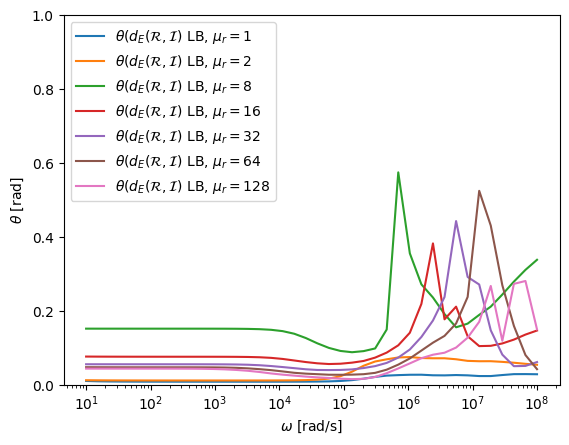

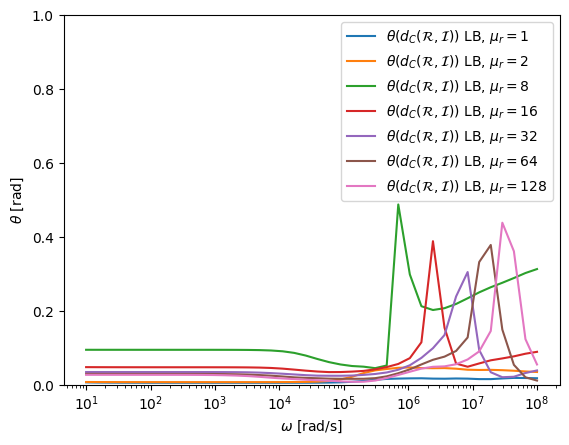

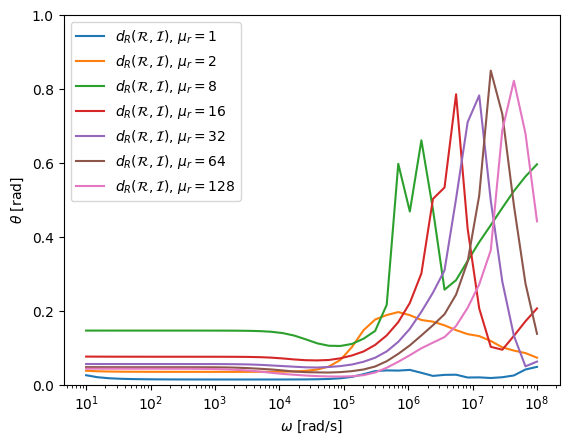

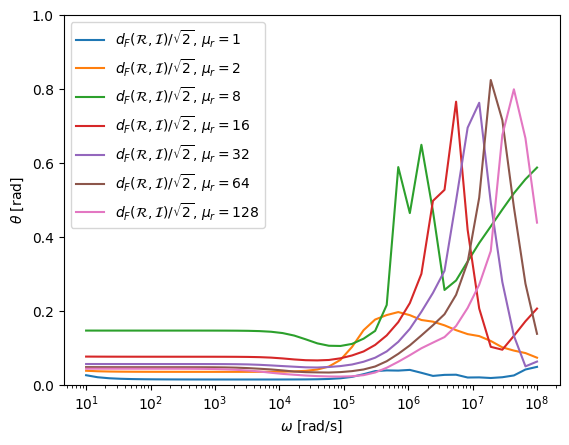

In [12]:
fig=plt.figure()
for count in range(7):
    plt.semilogx(Frequencies,Results[count,:],label=r'$\theta(d_E({\cal R},{\cal I})$ LB, $\mu_r=$'+str(murlist[count]))
plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel(r'$\theta$ [rad]')
plt.legend()
plt.ylim(0,1.0)
plt.savefig("CSG_TwoTetra_apprxdR_metrics_al_0.001_varymu_sig_1e7_ord3.pdf")
plt.show()

fig=plt.figure()
for count in range(7):
    plt.semilogx(Frequencies,dCresults[count,:],label=r'$\theta(d_C({\cal R},{\cal I}))$ LB, $\mu_r=$'+str(murlist[count]))
plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel(r'$\theta$ [rad]')
plt.legend()
plt.ylim(0,1.0)
plt.savefig("CSG_TwoTetra_apprxdR_metricsdC_al_0.001_varymu_sig_1e7_ord3.pdf")
plt.show()

fig=plt.figure()
for count in range(7):
    plt.semilogx(Frequencies,dRresults[count,:],label=r'$d_R({\cal R},{\cal I})$, $\mu_r=$'+str(murlist[count]))
plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel(r'$\theta$ [rad]')
plt.legend()
plt.ylim(0,1.0)
plt.savefig("CSG_TwoTetra_dR_metrics_al_0.001_varymu_sig_1e7_ord3.pdf")
plt.show()


fig=plt.figure()
for count in range(7):
    plt.semilogx(Frequencies,dFresults[count,:]/np.sqrt(2),label=r'$d_F({\cal R},{\cal I})/\sqrt{2}$, $\mu_r=$'+str(murlist[count]))
plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel(r'$\theta$ [rad]')
plt.legend()
plt.ylim(0,1.0)
plt.savefig("CSG_TwoTetra_dF_metrics_al_0.001_varymu_sig_1e7_ord3.pdf")
plt.show()



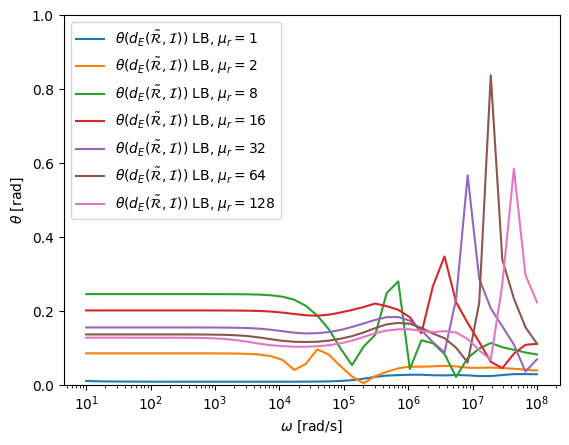

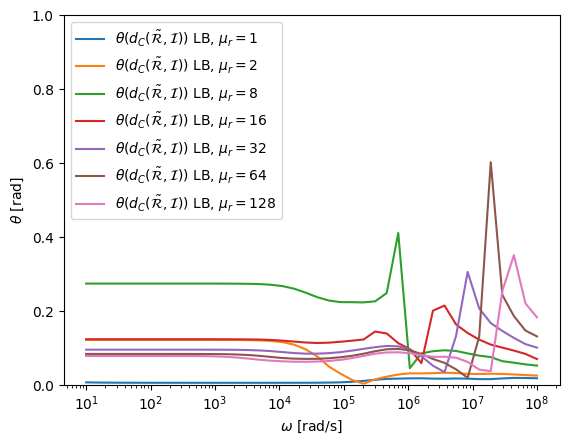

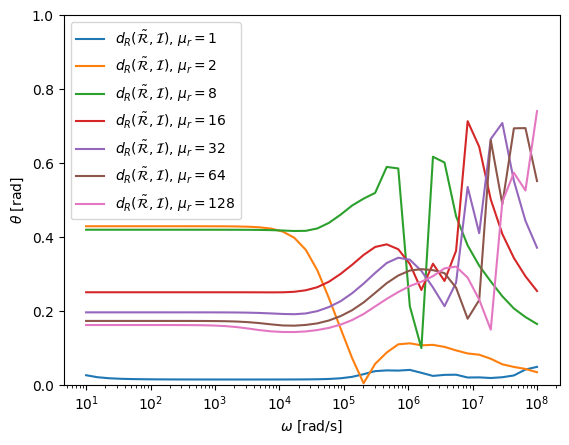

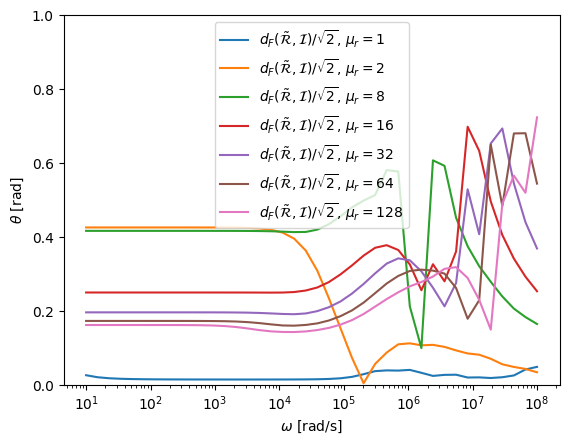

In [13]:
fig=plt.figure()
for count in range(7):
    plt.semilogx(Frequencies,TildeResults[count,:],label=r'$\theta(d_E(\tilde{\cal R},{\cal I}))$ LB, $\mu_r=$'+str(murlist[count]))
plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel(r'$\theta$ [rad]')
plt.legend()
plt.ylim(0,1.0)
plt.savefig("CSG_TwoTetra_apprxdR_metrics_tilde_al_0.001_varymu_sig_1e7_ord3.pdf")
plt.show()

fig=plt.figure()
for count in range(7):
    plt.semilogx(Frequencies,dCTilderesults[count,:],label=r'$\theta(d_C(\tilde{\cal R},{\cal I}))$ LB, $\mu_r=$'+str(murlist[count]))
plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel(r'$\theta$ [rad]')
plt.legend()
plt.ylim(0,1.0)
plt.savefig("CSG_TwoTetra_apprxdR_metricsdC_tilde_al_0.001_varymu_sig_1e7_ord3.pdf")
plt.show()


fig=plt.figure()
for count in range(7):
    plt.semilogx(Frequencies,dRTilderesults[count,:],label=r'$d_R(\tilde{\cal R},{\cal I})$, $\mu_r=$'+str(murlist[count]))
plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel(r'$\theta$ [rad]')
plt.legend()
plt.ylim(0,1.0)
plt.savefig("CSG_TwoTetra_dR_metrics_tilde_al_0.001_varymu_sig_1e7_ord3.pdf")
plt.show()

fig=plt.figure()
for count in range(7):
    plt.semilogx(Frequencies,dFTilderesults[count,:]/np.sqrt(2),label=r'$d_F(\tilde{\cal R},{\cal I})/\sqrt{2}$, $\mu_r=$'+str(murlist[count]))
plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel(r'$\theta$ [rad]')
plt.legend()
plt.ylim(0,1.0)
plt.savefig("CSG_TwoTetra_dF_metrics_tilde_al_0.001_varymu_sig_1e7_ord3.pdf")
plt.show()

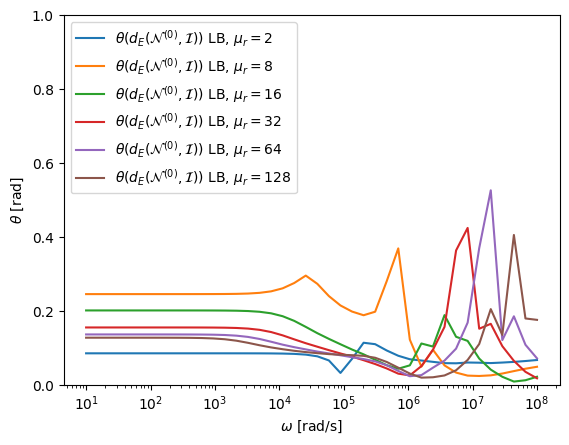

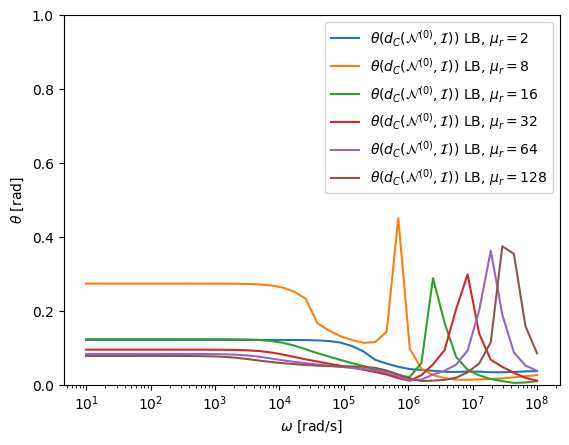

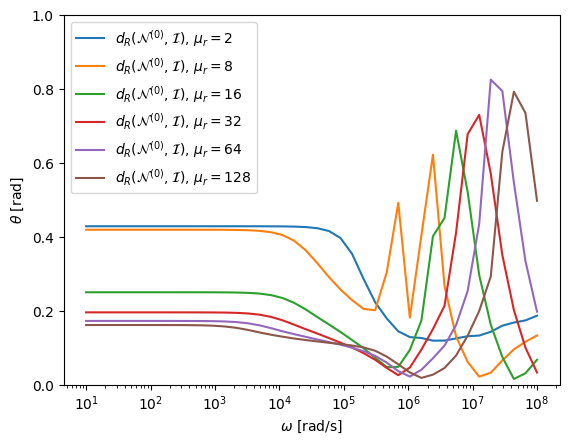

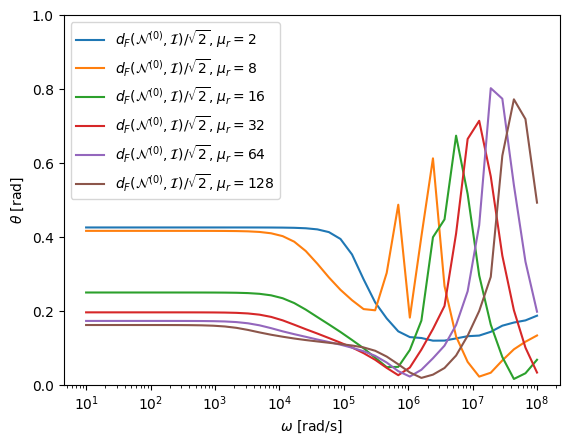

In [14]:
fig=plt.figure()
for count in range(1,7):
    plt.semilogx(Frequencies,N0Results[count,:],label=r'$\theta(d_E({\cal N}^{(0)},{\cal I}))$ LB, $\mu_r=$'+str(murlist[count]))
plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel(r'$\theta$ [rad]')
plt.legend()
plt.ylim(0,1.0)
plt.savefig("CSG_TwoTetra_apprxdR_metrics_N0_al_0.001_varymu_sig_1e7_ord3.pdf")
plt.show()

fig=plt.figure()
for count in range(1,7):
    plt.semilogx(Frequencies,dCN0results[count,:],label=r'$\theta(d_C({\cal N}^{(0)},{\cal I}))$ LB, $\mu_r=$'+str(murlist[count]))
plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel(r'$\theta$ [rad]')
plt.legend()
plt.ylim(0,1.0)
plt.savefig("CSG_TwoTetra_apprxdR_metricsdC_N0_al_0.001_varymu_sig_1e7_ord3.pdf")
plt.show()


fig=plt.figure()
for count in range(1,7):
    plt.semilogx(Frequencies,dRN0results[count,:],label=r'$d_R({\cal N}^{(0)},{\cal I})$, $\mu_r=$'+str(murlist[count]))
plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel(r'$\theta$ [rad]')
plt.legend()
plt.ylim(0,1.0)
plt.savefig("CSG_TwoTetra_dR_metrics_N0_al_0.001_varymu_sig_1e7_ord3.pdf")
plt.show()

fig=plt.figure()
for count in range(1,7):
    plt.semilogx(Frequencies,dFN0results[count,:]/np.sqrt(2),label=r'$d_F({\cal N}^{(0)},{\cal I})/\sqrt{2}$, $\mu_r=$'+str(murlist[count]))
plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel(r'$\theta$ [rad]')
plt.legend()
plt.ylim(0,1.0)
plt.savefig("CSG_TwoTetra_dF_metrics_N0_al_0.001_varymu_sig_1e7_ord3.pdf")
plt.show()